In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
data = pd.read_csv('..\data\sensex_INFY_transformed_data.csv', index_col=0)
data = data.drop(columns=['Target'])
data

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,19778560,60.846550,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644
1,20786048,64.059799,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262
2,25256320,66.248848,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353
3,20469632,67.349594,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243
4,12953792,70.557755,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...,...,...
6155,11056720,1866.900269,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811
6156,2781793,1868.988525,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381
6157,2360544,1854.176880,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501
6158,3623321,1852.574341,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594,47.407003


In [6]:
features = data.drop(columns=['Close'])
close_prices = data['Close']
features

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,19778560,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644
1,20786048,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262
2,25256320,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353
3,20469632,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243
4,12953792,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...,...
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501
6158,3623321,1877.364046,1871.376780,1842.041094,1791.353025,1693.894368,1536.949222,-8.473594,47.407003


In [7]:
close_price_next = close_prices.shift(-1)
close_price_next = close_price_next.dropna()
close_price_next

0         64.059799
1         66.248848
2         67.349594
3         70.557755
4         72.665695
           ...     
6154    1866.900269
6155    1868.988525
6156    1854.176880
6157    1852.574341
6158    1861.655518
Name: Close, Length: 6159, dtype: float64

In [8]:
features_adjusted = features.iloc[:-1, :]
features_adjusted

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,19778560,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644
1,20786048,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262
2,25256320,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353
3,20469632,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243
4,12953792,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977
...,...,...,...,...,...,...,...,...,...
6154,5323592,1903.759177,1877.009903,1838.860295,1785.592497,1687.091425,1531.728652,2.510011,55.398953
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501


In [9]:
close_prices_adjusted = close_prices.iloc[:-1]
target = ((close_price_next - close_prices_adjusted) / close_prices_adjusted)*100
target

0       5.280906
1       3.417196
2       1.661533
3       4.763444
4       2.987539
          ...   
6154   -1.235744
6155    0.111857
6156   -0.792495
6157   -0.086429
6158    0.490192
Name: Close, Length: 6159, dtype: float64

In [10]:
df_adjusted = pd.DataFrame(features_adjusted, columns=features.columns)
df_adjusted['Target'] = target.values
df_adjusted

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,Target
0,19778560,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644,5.280906
1,20786048,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262,3.417196
2,25256320,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353,1.661533
3,20469632,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243,4.763444
4,12953792,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977,2.987539
...,...,...,...,...,...,...,...,...,...,...
6154,5323592,1903.759177,1877.009903,1838.860295,1785.592497,1687.091425,1531.728652,2.510011,55.398953,-1.235744
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811,0.111857
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381,-0.792495
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501,-0.086429


In [11]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(features_adjusted, target, test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train)
X_test_scaled = Xscaler.transform(X_test)

In [13]:
test = pd.DataFrame(X_train, columns=features.columns)
test['y_train'] = y_train.values
test.sort_index()

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,y_train
0,19778560,61.285038,65.265204,69.784212,71.959252,73.210511,74.019727,-0.756295,37.852644,5.280906
1,20786048,61.839990,65.150403,69.559725,71.802828,73.119459,73.979967,-0.259355,44.944262,3.417196
2,25256320,62.721762,65.255017,69.429887,71.692848,73.051095,73.949104,0.237225,49.197353,1.661533
3,20469632,63.647328,65.454501,69.348307,71.606843,72.994364,73.922758,0.637554,51.237243,4.763444
4,12953792,65.029413,65.940525,69.395736,71.586069,72.970119,73.909325,1.089607,56.694977,2.987539
...,...,...,...,...,...,...,...,...,...,...
6153,3064095,1907.134213,1875.615258,1836.762388,1783.478022,1685.049540,1530.291656,6.142907,63.320892,-1.664858
6154,5323592,1903.759177,1877.009903,1838.860295,1785.592497,1687.091425,1531.728652,2.510011,55.398953,-1.235744
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811,0.111857
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501,-0.086429


In [14]:
X_test_scaled

array([[-0.13133104, -0.72667936, -0.72068079, ..., -0.61865317,
        -0.02527646, -1.2237665 ],
       [-0.64676117,  2.0282171 ,  2.11886346, ...,  2.40577617,
        -1.59838333, -2.03482859],
       [-0.55696433,  2.04340687,  1.99505271, ...,  2.28434233,
         2.59061577,  1.35677291],
       ...,
       [-0.50657465, -0.16070079, -0.15390353, ..., -0.20231529,
         0.15112177, -0.63393985],
       [-0.49685162,  2.76023865,  2.65573596, ...,  2.48776071,
        -0.76246609,  1.19311919],
       [-0.67816288,  2.55892519,  2.49684376, ...,  1.88272588,
         2.79652796,  1.50166733]], shape=(1232, 9))

In [15]:
model_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model_regressor.fit(X_train_scaled, y_train)
predictions = model_regressor.predict(X_test_scaled)
model_regressor.score(X_test_scaled, y_test)

-0.08231899093746642

In [16]:
y_test

2213   -0.230801
5980   -0.162267
5907   -0.386738
5272    0.199675
4954    1.433965
          ...   
5380   -0.126474
5242   -2.005969
3700    0.504185
6059   -3.805176
5421   -0.269425
Name: Close, Length: 1232, dtype: float64

In [17]:
y_test_series = pd.Series(y_test, index=X_test.index)
pred_series   = pd.Series(predictions, index=X_test.index)
df2 = pd.DataFrame(pred_series, columns=['y_predicted'])
df2['y_test'] = y_test_series
df2.sort_index()

,y_predicted,y_test
8,2.320300,1.018224
14,0.053244,8.000330
15,-0.179393,8.000382
17,-0.174782,0.763914
19,0.819950,-4.211399
...,...,...
6127,0.316305,1.647583
6141,0.551091,0.654316
6151,-0.895480,-0.174238
6152,-0.214044,0.129008


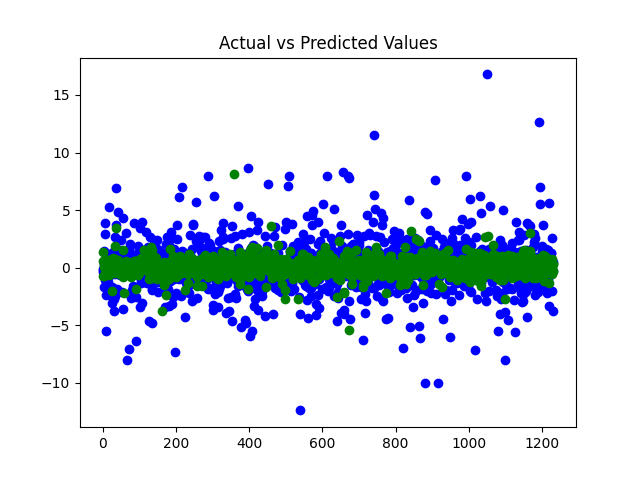

In [18]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.figure()
plt.clf()
plt.scatter(range(len(y_test)), y_test, color='Blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='Green', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [19]:
model_regressor_non_standard = RandomForestRegressor(n_estimators=100, random_state=42)
model_regressor_non_standard.fit(X_train, y_train)
predictions_non_standard = model_regressor_non_standard.predict(X_test)
model_regressor_non_standard.score(X_test, y_test)

-0.08092113422343483

In [20]:
X_train_unshuffled, X_test_unshuffled, y_train_unshuffled, y_test_unshuffled = train_test_split(features_adjusted, target, test_size=0.2, shuffle=False)
X_test_unshuffled

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
4927,6519403,632.126727,625.774496,622.566253,627.151662,621.427770,571.737462,0.994240,58.258290
4928,7899363,630.793532,625.744616,622.679763,627.118179,621.467899,571.951926,0.093924,51.368215
4929,8639443,628.059984,624.923775,622.461960,626.920310,621.424694,572.132261,-1.059359,46.160038
4930,13521186,627.479982,624.946270,622.567765,626.885452,621.461861,572.343948,-1.263685,51.286986
4931,9341405,628.837623,625.834072,623.026605,627.031645,621.589287,572.591151,-0.791088,56.360516
...,...,...,...,...,...,...,...,...,...
6154,5323592,1903.759177,1877.009903,1838.860295,1785.592497,1687.091425,1531.728652,2.510011,55.398953
6155,11056720,1896.387395,1876.047081,1839.959902,1787.202552,1688.880568,1533.066662,-1.640194,50.438811
6156,2781793,1890.907621,1875.374837,1841.098279,1788.822077,1690.672687,1534.407668,-4.269369,50.862381
6157,2360544,1883.561473,1873.355984,1841.611166,1790.116231,1692.299595,1535.684191,-6.876149,47.745501


In [21]:
np.random.seed(42)
model_regressor_unshuffled = RandomForestRegressor(n_estimators=100, max_depth=100,min_samples_split=10)
model_regressor_unshuffled.fit(X_train_unshuffled, y_train_unshuffled)
predictions_unshuffled = model_regressor_unshuffled.predict(X_test_unshuffled)
model_regressor_unshuffled.score(X_test_unshuffled, y_test_unshuffled)

-26.160115861733207

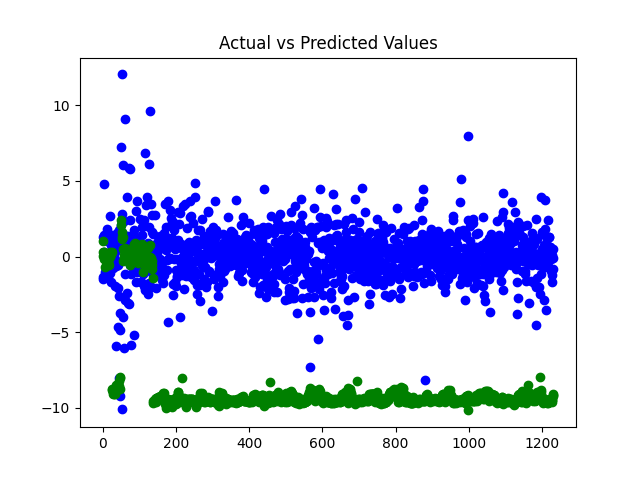

In [22]:
%matplotlib widget
plt.figure()
plt.clf()
plt.scatter(range(len(y_test_unshuffled)), y_test_unshuffled, color='Blue', label='Actual')
plt.scatter(range(len(predictions_unshuffled)), predictions_unshuffled, color='Green', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [23]:
scaler_unshuffled = StandardScaler()
X_train_unshuffled_scaled = scaler_unshuffled.fit_transform(X_train_unshuffled)
X_test_unshuffled_scaled = scaler_unshuffled.transform(X_test_unshuffled)
X_train_unshuffled_scaled

array([[ 0.14710359, -0.99322332, -0.96910975, ..., -0.89870868,
        -0.5109555 , -1.27306548],
       [ 0.20585519, -0.98991012, -0.96979749, ..., -0.89898589,
        -0.17832164, -0.660973  ],
       [ 0.46653886, -0.98464574, -0.96917077, ..., -0.89920107,
         0.1540715 , -0.29387971],
       ...,
       [-0.88309667,  2.39308813,  2.36765867, ...,  2.56600863,
         0.87800961,  0.59739471],
       [-0.67632441,  2.39645506,  2.37282427, ...,  2.56768801,
         0.65865278,  0.46186128],
       [-0.54658894,  2.41074254,  2.38303783, ...,  2.56963093,
         0.8699171 ,  0.93335885]], shape=(4927, 9))

In [24]:
np.random.seed(42)
model_regressor_unshuffled_scaled = RandomForestRegressor(n_estimators=100, max_depth=100,min_samples_split=10)
model_regressor_unshuffled_scaled.fit(X_train_unshuffled_scaled, y_train_unshuffled)
predictions_unshuffled_scaled = model_regressor_unshuffled_scaled.predict(X_test_unshuffled_scaled)
model_regressor_unshuffled_scaled.score(X_test_unshuffled_scaled, y_test_unshuffled)

-26.160115861733207

### Evaluate the model using Mean Absolute Error method of scikit-learn.

In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
mae

1.6406912686983144